<h1 style='background: black; border-radius:10px; color: white; text-align: center'><center>Web scrapping with BS4 👾 - part 1 : </center></h1>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. You can extract data from almost any website and create you own dataset for your data science project. 

In this series I will be creating new datasets using beautifulsoup and post **step by step** code for each of them. As a beginner you really get confused at first that how can I make my own datasets, if you are a beginner then this is for you, it will be really beginner friendly.

* Here I have taken a random integers to create a particular row of the whole dataset. You can use loops to create the whole dataset by your own.
* Or you can check out my github repo to get the exact code.


You can check the [Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) if you want, but you won't need to.

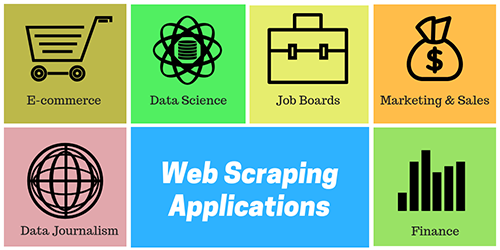

<h2 style='background: black; border-radius:10px; color: white; text-align: center'><center> Suggestion </center></h2>

* Do run all the print statements that I have commented out.
* I would suggest you to copy this notebook and run with your own **URL**
* Get your hands dirty by creating your own dataset... 

# Import 

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import random

There are mainly 4 steps invloved in the process.

1. Grab the link of the site from where you want to pull the data 
2. Get the HTML content of the page 
3. Make a soup 
4. Go back to the website, Press __Ctrl + Shift + I__ or __inspect__. Find the particular **HTML tag** that contains your data and grab data from the tag by its class, name or id. 

In [ ]:
finalCollegeList = []

stateList = ["tamil-nadu", "maharashtra", "uttar-pradesh", "delhi-ncr", "andhra-pradesh", 
             "karnataka", "telangana", "madhya-pradesh" ]


streamList = ["engineering", "management", "science",
              "commerce", "arts", "hotel-management", 
              "agriculture", "medical", "pharmacy", "law"]


"""
 test the code for some random state and stream
"""
m = random.randint(0,len(streamList)-1)
n = random.randint(0,len(stateList)-1)

# for m in range(len(streamList)) : 
#     for n in range(len(stateList)) : 

"""
make soup of the main page 
"""
url = 'https://collegedunia.com/'+streamList[m]+'/'+stateList[n]+'-colleges' 
page = requests.get(url) # step 1 
htmlcontent = page.content # step 2
soup = BeautifulSoup(htmlcontent, 'html.parser') # step 3

# print(soup)

In [ ]:
# div conataining particular informations
collegeDiv_MainPage = soup.find_all("div",{"class" : 
    "jsx-765939686 listing-block text-uppercase bg-white position-relative"})
# print(collegeDiv_MainPage)

In [ ]:
print(len(collegeDiv_MainPage))

In [ ]:
# for collegeDiv in collegeDiv_MainPage : 

i = random.randint(0,len(collegeDiv_MainPage)-1)

collegeDiv = collegeDiv_MainPage[i]

featured = collegeDiv.find("span", {"class" : 
    "jsx-765939686 featured_flag text-md text-white position-absolute"}) # finding the featured colleges

if featured == None : #filtering out the non featured colleges 

    name = collegeDiv.find("h3", {"class" : 
            "jsx-765939686 text-white font-weight-bold text-md m-0"}) # grabbing college name tag
    print(name)    

In [ ]:
name_text = name.text.split()
print(name_text)

In [ ]:
i, collegeName,  = 0,""  
while i<len(name_text) :

    if name_text[i] == '-' : # removing the second name 
        break 

    else : 
        collegeName += name_text[i] + " "
        i+=1
        
print(collegeName)

In [ ]:
collegeInfo = [] # college info list
collegeInfo.append(collegeName) # adding name
collegeInfo.append(stateList[n]) # state
collegeInfo.append(streamList[m]) # stream

print(collegeInfo)

In [ ]:
fee = collegeDiv.find_all("span", {"class" : 
            "jsx-765939686 lr-key text-lg text-primary d-block font-weight-bold"}) # UG PG fees
print(fee)

In [ ]:
if len(fee)>0 : 
    for i in range(2) :
        """
        there are fees and rating inside the same div 
        so if the text starts with '₹' we select that as a fee. 
        we are supposed to have 2 fees, if we can't find one we fill that with nan value
        """
        try :
            if fee[i].text[0] == '₹' :
                collegeInfo.append(fee[i].text)
            else : 
                collegeInfo.append(np.nan) 
        except : 
            collegeInfo.append(np.nan)
            
collegeInfo

In [ ]:
collegePageLink = "https://collegedunia.com" + collegeDiv.find('a', {"class" : 
                "jsx-765939686 college_name m-0 text-white font-weight-bold text-md"})['href']

collegePage = requests.get(collegePageLink)
collegeHtmlcontent = collegePage.content
collegeSoup = BeautifulSoup(collegeHtmlcontent, 'html.parser')

In [ ]:
# if we can't find rating we fill that with nan value
try : 
    collegeRating = collegeSoup.find("div", {"class" : "h1 mb-0"})
    collegeInfo.append(collegeRating.text)
except : 
    collegeInfo.append(np.nan)
    
print(collegeInfo)

In [ ]:
collegeOtherRatings = collegeSoup.find_all("div", {"class" : 
                        "jsx-447651942 info d-inline-block ml-3 text-black-heading"})

otherRatingList = ["Academic", "Accommodation", "Faculty", 
                    "Infrastructure", "Placement", "Social Life"]

i, j = 0, 0
while i<len(collegeOtherRatings) and j < len(otherRatingList): 
    if collegeOtherRatings[i].text[7:] == otherRatingList[j] : 
        collegeInfo.append(collegeOtherRatings[i].text[:7])
        i += 1
        j += 1
    else : 
        collegeInfo.append(np.nan)
        j += 1

if j != len(otherRatingList) : 
    for i in range(len(otherRatingList)-j) : 
        collegeInfo.append(np.nan)
        
print(collegeInfo)

In [ ]:
finalCollegeList.append(collegeInfo)
print(finalCollegeList)

In [ ]:
df = pd.DataFrame(finalCollegeList, 
                    columns=["College_Name", "State", "Stream", "UG_fee",
                                "PG_fee", "Rating", "Academic", 
                                "Accommodation","Faculty","Infrastructure",
                                "Placement","Social_Life"])
df

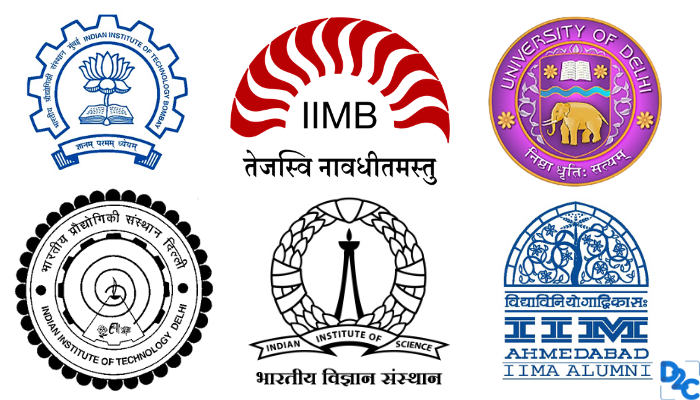

In [ ]:
df.fillna(value = '--', inplace = True)
for i in range(len(df)) : 
    if df.UG_fee[i] != "--" : 
        df.UG_fee[i] = df.UG_fee[i][1:]
    if df.PG_fee[i] != "--" : 
        df.PG_fee[i] = df.PG_fee[i][1:]
    if df.Rating[i] != "--" : 
        df.Rating[i] = df.Rating[i][:3]
    if df.Academic[i] != "--" : 
        df.Academic[i] = df.Academic[i][:4]
    if df.Accommodation[i] != "--" : 
        df.Accommodation[i] = df.Accommodation[i][:4]
    if df.Faculty[i] != "--" : 
        df.Faculty[i] = df.Faculty[i][:4]
    if df.Infrastructure[i] != "--" : 
        df.Infrastructure[i] = df.Infrastructure[i][:4]
    if df.Placement[i] != "--" : 
        df.Placement[i] = df.Placement[i][:4]
    if df.Social_Life[i] != "--" : 
        df.Social_Life[i] = df.Social_Life[i][:4]
    var = df.State[i].split('-')
    if len(var) == 2 : 
        state = var[0] +' '+var[1]
    else : 
        state = var[0]
    df.State[i] = state.capitalize()
    df.Stream[i] = df.Stream[i].capitalize()
    
df

### Actual [DataSet](https://www.kaggle.com/soumyadipghorai/top-indian-colleges)

In [ ]:
DF = pd.read_csv('../input/top-indian-colleges/College_data.csv')
DF

If you Liked my EDA then do **upvote**. That really motivates a lot...

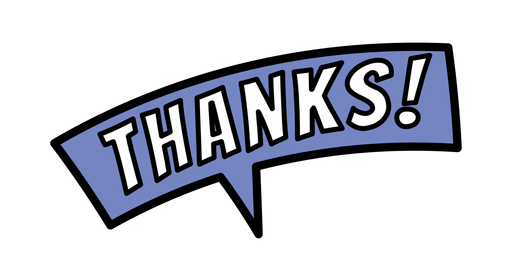